# eICU data exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataExtraction import get_query_result, extract_csv

In [3]:
qr = get_query_result(user="dtank", database="eicu", query="SELECT count(*) FROM patient;")[0][0]
print(qr)

200859


In [4]:
# extract_csv(saveto="/home/dtank/data/volume_2/eicu_csv/noteTRY.csv",
#             variablestring="patientUnitStayID, notePath, noteText", 
#             table="note")

## Basic dataset characteristics


In [5]:
print("Number of patients in the dataset: ", 
      get_query_result(user="dtank", database="eicu", query="SELECT COUNT(DISTINCT uniquePid) FROM patient;")[0][0])
print("Number of admissions in the dataset: ",
     get_query_result(user="dtank", database="eicu", query="SELECT COUNT(*) FROM patient;")[0][0])
print("Number of hospitals in the dataset: ",
     get_query_result(user="dtank", database="eicu", query="SELECT COUNT(DISTINCT hospitalID) FROM patient;")[0][0])
print("Number of wards in the dataset: ",
     get_query_result(user="dtank", database="eicu", query="SELECT COUNT(DISTINCT wardID) FROM patient;")[0][0])
print("Number of admission diagnoses in the dataset: ",
     get_query_result(user="dtank", database="eicu", query="SELECT COUNT(DISTINCT apacheAdmissionDx) FROM patient;")[0][0])
print("Number of ICU units in the dataset: ",
     get_query_result(user="dtank", database="eicu", query="SELECT COUNT(DISTINCT unitType) FROM patient;")[0][0])
print("Years in the dataset: ",
     get_query_result(user="dtank", database="eicu", query="SELECT DISTINCT hospitalDischargeYear FROM patient;"))

# also include country, year, version of the dataset

Number of patients in the dataset:  139367
Number of admissions in the dataset:  200859
Number of hospitals in the dataset:  208
Number of wards in the dataset:  335
Number of admission diagnoses in the dataset:  393
Number of ICU units in the dataset:  8
Years in the dataset:  [(2014,), (2015,)]


## Patient characteristics

In [6]:
extract_csv(saveto="/home/dtank/data/volume_2/eicu_csv/patientCharacteristics.csv",
            variablestring="patientunitstayid, uniquePid, gender, age, ethnicity, admissionHeight, hospitalDischargeStatus, unitType, admissionWeight, unitDischargeStatus", 
            table="patient")

COPY 200859
data extracted


In [7]:
patientChar = pd.read_csv("/home/dtank/data/volume_2/eicu_csv/patientCharacteristics.csv")
patientChar

,patientunitstayid,uniquepid,gender,age,ethnicity,admissionheight,hospitaldischargestatus,unittype,admissionweight,unitdischargestatus
0,141168,002-34851,Female,70,Caucasian,152.4,Expired,Med-Surg ICU,84.3,Expired
1,141178,002-33870,Female,52,Caucasian,162.6,Alive,Med-Surg ICU,54.4,Alive
2,141179,002-33870,Female,52,Caucasian,162.6,Alive,Med-Surg ICU,NaN,Alive
3,141194,002-5276,Male,68,Caucasian,180.3,Alive,CTICU,73.9,Alive
4,141196,002-37665,Male,71,Caucasian,162.6,Alive,Med-Surg ICU,NaN,Alive
...,...,...,...,...,...,...,...,...,...,...
200854,3353235,035-16382,Male,50,Caucasian,175.3,Alive,Cardiac ICU,90.0,Alive
200855,3353237,035-751,Female,79,Caucasian,162.6,Alive,MICU,78.4,Alive
200856,3353251,035-5166,Male,73,African American,177.8,Alive,Cardiac ICU,102.0,Alive
200857,3353254,035-19511,Male,81,Caucasian,185.4,Alive,Med-Surg ICU,83.9,Alive


In [8]:
patientChar['age'] = patientChar['age'].replace("> 89", "89") # replace all > 89 with 89 entries 
patientChar['age'] = patientChar['age'].astype('float') # convert age from strings to floats

# renaming conventions
patientChar['gender'] = patientChar['gender'].replace("Other", "Other/Unknown") 
patientChar['gender'] = patientChar['gender'].replace("Unknown", "Other/Unknown") 

patientChar['hospitaldischargestatus'] = patientChar['hospitaldischargestatus'].replace('Alive', 'Alive at hospital discharge')
patientChar['hospitaldischargestatus'] = patientChar['hospitaldischargestatus'].replace('Expired', 'Dead at hospital discharge')

patientChar = patientChar.drop_duplicates(subset='uniquepid')
patientChar
# np.where(patientChar['hospitaldischargestatus'] == patientChar['unitdischargestatus'])[0].size # hospitaldischargestatus and unitdischargestatus are not the same

,patientunitstayid,uniquepid,gender,age,ethnicity,admissionheight,hospitaldischargestatus,unittype,admissionweight,unitdischargestatus
0,141168,002-34851,Female,70.0,Caucasian,152.4,Dead at hospital discharge,Med-Surg ICU,84.3,Expired
1,141178,002-33870,Female,52.0,Caucasian,162.6,Alive at hospital discharge,Med-Surg ICU,54.4,Alive
3,141194,002-5276,Male,68.0,Caucasian,180.3,Alive at hospital discharge,CTICU,73.9,Alive
4,141196,002-37665,Male,71.0,Caucasian,162.6,Alive at hospital discharge,Med-Surg ICU,NaN,Alive
6,141203,002-23234,Female,77.0,Caucasian,160.0,Alive at hospital discharge,Med-Surg ICU,70.2,Alive
...,...,...,...,...,...,...,...,...,...,...
200852,3353216,035-2734,Female,50.0,African American,165.1,Alive at hospital discharge,CTICU,55.4,Alive
200854,3353235,035-16382,Male,50.0,Caucasian,175.3,Alive at hospital discharge,Cardiac ICU,90.0,Alive
200855,3353237,035-751,Female,79.0,Caucasian,162.6,Alive at hospital discharge,MICU,78.4,Alive
200857,3353254,035-19511,Male,81.0,Caucasian,185.4,Alive at hospital discharge,Med-Surg ICU,83.9,Alive


In [9]:
# !pip install tableone
from tableone import TableOne, load_dataset

In [10]:
columns = ['gender', 'age', 'ethnicity', 'admissionheight', 'admissionweight', 'unittype']
categorical = ['gender', 'ethnicity', 'unittype']
labels = {'gender' : 'Gender', 
          'age' : 'Age', 
          'ethnicity' : 'Ethnicity', 
          'admissionheight' : 'Height', 
          'admissionweight' : 'Weight', 
          'unittype' : 'ICU Unit'}

patientCharTable = TableOne(patientChar, columns=columns, categorical=categorical, rename=labels,
                            label_suffix=True, nonnormal=['age'], groupby='hospitaldischargestatus', pval=True)

In [11]:
patientCharTable

Grouped by hospitaldischargestatus                                                                                 
                                                                Missing           Overall Alive at hospital discharge Dead at hospital discharge P-Value
n                                                                                  139367                      124981                      13129        
Gender, n (%)       Female                                          111      64038 (46.0)                57289 (45.9)                6144 (46.8)  <0.001
                    Male                                                     75176 (54.0)                67579 (54.1)                6963 (53.1)        
                    Other/Unknown                                                42 (0.0)                    26 (0.0)                   16 (0.1)        
Age, median [Q1,Q3]                                                  82  65.0 [53.0,77.0]            64.0 [52.0,76.0]           72.0 [61.0,82.0]  <0.001
Ethnicity, n (%)    African American                               1780      14672 (10.7)                13255 (10.7)                1303 (10.1)   0.141
                    Asian                                                      2338 (1.7)                  2073 (1.7)                  232 (1.8)        
                    Caucasian                                               107724 (78.3)                96567 (78.3)               10198 (78.7)        
                    Hispanic                                                   5233 (3.8)                  4685 (3.8)                  523 (4.0)        
                    Native American                                             964 (0.7)                   871 (0.7)                   87 (0.7)        
                    Other/Unknown                                              6656 (4.8)                  5945 (4.8)                  621 (4.8)        
Height, mean (SD)                                                  3153      169.3 (13.9)                169.4 (13.8)               168.3 (14.6)  <0.001
Weight, mean (SD)                                                  8170       83.9 (26.9)                 84.2 (26.7)                80.7 (28.1)  <0.001
ICU Unit, n (%)     CCU-CTICU                                         0       11404 (8.2)                 10386 (8.3)                  979 (7.5)  <0.001
                    CSICU                                                      5164 (3.7)                  4821 (3.9)                  305 (2.3)        
                    CTICU                                                      4597 (3.3)                  4302 (3.4)                  261 (2.0)        
                    Cardiac ICU                                                9362 (6.7)                  8243 (6.6)                 1026 (7.8)        
                    MICU                                                      11721 (8.4)                 10093 (8.1)                1546 (11.8)        
                    Med-Surg ICU                                             77928 (55.9)                69767 (55.8)                7359 (56.1)        
                    Neuro ICU                                                 10678 (7.7)                  9641 (7.7)                  916 (7.0)        
                    SICU                                                       8513 (6.1)                  7728 (6.2)                  737 (5.6)        
[1] Chi-squared tests for the following variables may be invalid due to the low number of observations: gender.

In [12]:
print(patientCharTable.tabulate(tablefmt = 'latex'))

\begin{tabular}{lllllll}
\hline
                     &                  & Missing   & Overall          & Alive at hospital discharge   & Dead at hospital discharge   & P-Value   \\
\hline
 n                   &                  &           & 139367           & 124981                        & 13129                        &           \\
 Gender, n (\%)       & Female           & 111       & 64038 (46.0)     & 57289 (45.9)                  & 6144 (46.8)                  & \ensuremath{<}0.001    \\
                     & Male             &           & 75176 (54.0)     & 67579 (54.1)                  & 6963 (53.1)                  &           \\
                     & Other/Unknown    &           & 42 (0.0)         & 26 (0.0)                      & 16 (0.1)                     &           \\
 Age, median [Q1,Q3] &                  & 82        & 65.0 [53.0,77.0] & 64.0 [52.0,76.0]              & 72.0 [61.0,82.0]             & \ensuremath{<}0.001    \\
 Ethnicity, n (\%)    & African American

In [13]:
query = """SELECT ethnicity, COUNT(*) 
        FROM patient 
        WHERE hospitalDischargeStatus='Expired' AND age BETWEEN '15' AND '17' 
        GROUP BY ethnicity;"""
get_query_result(user="dtank", database="eicu", query=query)

[('African American', 2), ('Caucasian', 12), ('Hispanic', 1)]

In [14]:
patientChar.groupby('ethnicity')['age', 'admissionweight'].mean()

/tmp/ipykernel_10309/595031919.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  patientChar.groupby('ethnicity')['age', 'admissionweight'].mean()


,age,admissionweight
ethnicity,,
African American,56.788290,87.773471
Asian,62.905902,66.937760
Caucasian,64.424793,84.120066
Hispanic,60.847697,78.483982
Native American,52.486515,88.118655
Other/Unknown,58.823017,80.159628


In [15]:
patientChar = pd.read_csv("/home/dtank/data/volume_2/eicu_csv/patientCharacteristics.csv")

lastcat = [str(x) for x in list(range(80, 90))]
lastcat.append('> 89')

patientChar['age'] = patientChar['age'].replace(dict.fromkeys([str(x) for x in list(range(0, 20))], '0-20'))
patientChar['age'] = patientChar['age'].replace(dict.fromkeys([str(x) for x in list(range(20, 30))], '20-30'))
patientChar['age'] = patientChar['age'].replace(dict.fromkeys([str(x) for x in list(range(30, 40))], '30-40'))
patientChar['age'] = patientChar['age'].replace(dict.fromkeys([str(x) for x in list(range(40, 50))], '40-50'))
patientChar['age'] = patientChar['age'].replace(dict.fromkeys([str(x) for x in list(range(50, 60))], '50-60'))
patientChar['age'] = patientChar['age'].replace(dict.fromkeys([str(x) for x in list(range(60, 70))], '60-70'))
patientChar['age'] = patientChar['age'].replace(dict.fromkeys([str(x) for x in list(range(70, 80))], '70-80'))
patientChar['age'] = patientChar['age'].replace(dict.fromkeys(lastcat, '80+'))
patientChar

,patientunitstayid,uniquepid,gender,age,ethnicity,admissionheight,hospitaldischargestatus,unittype,admissionweight,unitdischargestatus
0,141168,002-34851,Female,70-80,Caucasian,152.4,Expired,Med-Surg ICU,84.3,Expired
1,141178,002-33870,Female,50-60,Caucasian,162.6,Alive,Med-Surg ICU,54.4,Alive
2,141179,002-33870,Female,50-60,Caucasian,162.6,Alive,Med-Surg ICU,NaN,Alive
3,141194,002-5276,Male,60-70,Caucasian,180.3,Alive,CTICU,73.9,Alive
4,141196,002-37665,Male,70-80,Caucasian,162.6,Alive,Med-Surg ICU,NaN,Alive
...,...,...,...,...,...,...,...,...,...,...
200854,3353235,035-16382,Male,50-60,Caucasian,175.3,Alive,Cardiac ICU,90.0,Alive
200855,3353237,035-751,Female,70-80,Caucasian,162.6,Alive,MICU,78.4,Alive
200856,3353251,035-5166,Male,70-80,African American,177.8,Alive,Cardiac ICU,102.0,Alive
200857,3353254,035-19511,Male,80+,Caucasian,185.4,Alive,Med-Surg ICU,83.9,Alive


In [42]:
print((patientChar.groupby(['ethnicity', 'age']).hospitaldischargestatus.value_counts().to_frame()).to_string())

                                                hospitaldischargestatus
ethnicity        age   hospitaldischargestatus                         
African American 0-20  Alive                                        250
                       Expired                                        9
                 20-30 Alive                                       1368
                       Expired                                       41
                 30-40 Alive                                       1855
                       Expired                                      108
                 40-50 Alive                                       2738
                       Expired                                      180
                 50-60 Alive                                       4379
                       Expired                                      350
                 60-70 Alive                                       4358
                       Expired                                  

In [114]:
mortEthAge = patientChar.groupby(['ethnicity', 'age'], as_index=False).hospitaldischargestatus.value_counts()
mortEthAge = mortEthAge.tail(-1)
mortEthAge = mortEthAge.iloc[::2].reset_index(drop=True)

# mortEthAge['count'] = (mortEthAge['count']/139367)*1000

mortEthAge

,ethnicity,age,hospitaldischargestatus,count
0,African American,0-20,Expired,9
1,African American,20-30,Expired,41
2,African American,30-40,Expired,108
3,African American,40-50,Expired,180
4,African American,50-60,Expired,350
5,African American,60-70,Expired,470
6,African American,70-80,Expired,395
7,African American,80+,Expired,312
8,Asian,0-20,Expired,1
9,Asian,20-30,Expired,6


In [120]:
AfAm = (mortEthAge[mortEthAge['ethnicity'] == 'African American']['count']/14672*1000).to_list()
Asian = (mortEthAge[mortEthAge['ethnicity'] == 'Asian']['count']/2338*1000).to_list()
Caucas = (mortEthAge[mortEthAge['ethnicity'] == 'Caucasian']['count']/107724*1000).to_list()
NatAm = (mortEthAge[mortEthAge['ethnicity'] == 'Native American']['count']/964*1000).to_list()
Unkn = (mortEthAge[mortEthAge['ethnicity'] == 'Other/Unknown']['count']/6656*1000).to_list()
print(AfAm)

[0.6134133042529989, 2.7944383860414397, 7.360959651035986, 12.268266085059977, 23.854961832061072, 32.033805888767716, 26.922028353326063, 21.264994547437297]


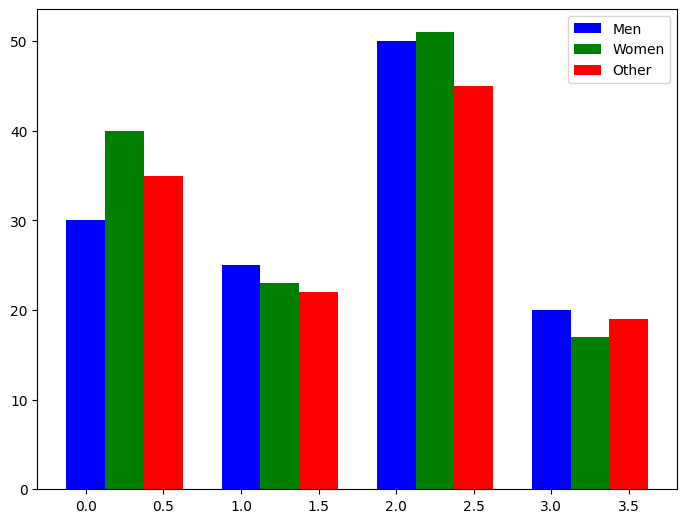

In [128]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.legend(labels=['Men', 'Women', 'Other'])
plt.show()

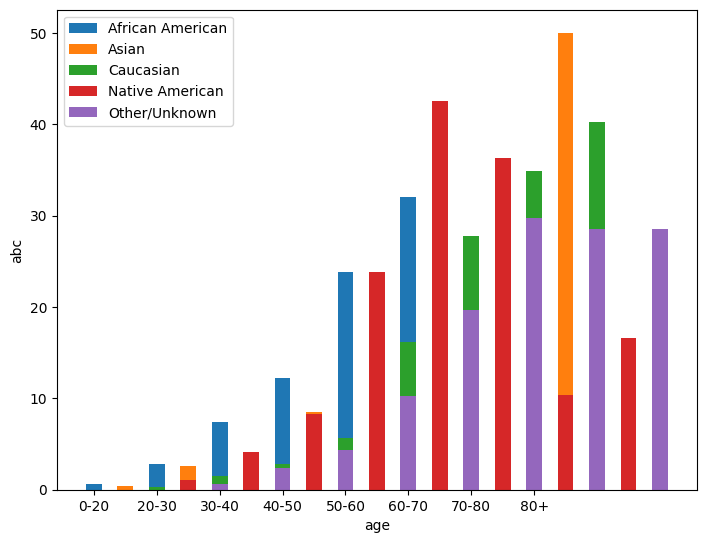

In [129]:
X = np.arange(8)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, AfAm, width = 0.25)
ax.bar(X + 0.50, Asian, width = 0.25)
ax.bar(X + 1.00, Caucas, width = 0.25)
ax.bar(X + 1.50, NatAm, width = 0.25)
ax.bar(X + 2.00, Unkn, width = 0.25)
ax.set_xlabel('age')
ax.set_ylabel('abc')
ax.legend(labels=['African American', 'Asian', 'Caucasian', 'Native American', 'Other/Unknown'])
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7), ('0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+'))
plt.show()